In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_list = []
for i in range(1,8):
    try:
        data = pd.read_csv('./dataset/lianjia{}.csv'.format(i), encoding='gbk')
    except:
        data = pd.read_csv('./dataset/lianjia{}.csv'.format(i))
    finally:
        data_list.append(data)
data = pd.concat(data_list)
data = data.dropna()

In [3]:
data.cjdanjia = np.round(data.cjdanjia.str.replace('元/平','').astype(np.float32).map(lambda x:x/10000),2)

In [4]:
data1 = data[data.cjxiaoqu.str.contains('龙锦苑东一区 3室2厅 124平')]

In [20]:
data1

,cjtaoshu,mendian,cjzongjia,zhiwei,haoping,cjdanjia,cjxiaoqu,xingming,cjzhouqi,biaoqian,cjlouceng,cjshijian,congyenianxian,bankuai
384,31,龙跃店,240.0,店经理,94% 226,1.93,龙锦苑东一区 3室2厅 124平,孙阿伟,41,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2015-12-16,3-4年,回龙观
3778,23,流星花园店,204.0,经纪人,97% 104,1.64,龙锦苑东一区 3室2厅 124平,唐生,45,房东信赖;销售达人,南 北/高楼层/6层,签约时间：2012-12-22,5年以上,回龙观
6805,34,上北社区一店,260.8,店经理,95% 392,2.10,龙锦苑东一区 3室2厅 124平,盛起云,41,房东信赖;销售达人;带看活跃,南 北/中楼层/6层,签约时间：2014-02-22,3-4年,回龙观
10369,43,龙泽城铁店,290.0,店经理,99% 245,2.34,龙锦苑东一区 3室2厅 124平,苑文超,30,房东信赖;销售达人,南 北/高楼层/6层,签约时间：2016-03-21,5年以上,回龙观
12006,45,和谐家园社区店,226.0,店经理,97% 183,1.82,龙锦苑东一区 3室2厅 124平,张晓维,65,房东信赖;销售达人;带看活跃,南 北/高楼层/6层,签约时间：2013-03-15,5年以上,回龙观
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33919,16,龙锦东一店,243.5,店经理,96% 121,1.96,龙锦苑东一区 3室2厅 124平,李志杨,23,房东信赖,南 北/低楼层/6层,签约时间：2014-08-24,3-4年,回龙观
33921,16,龙锦东一店,170.0,店经理,96% 121,1.37,龙锦苑东一区 3室2厅 124平,李志杨,23,房东信赖,南 北/低楼层/6层,签约时间：2014-07-30,3-4年,回龙观
36048,4,龙腾东店,318.0,高级经纪人,98% 107,2.56,龙锦苑东一区 3室2厅 124平,刘亚茹,29,带看活跃,南 北/中楼层/6层,签约时间：2016-04-16,<1年,回龙观
36144,22,龙泽苑西区店,218.0,高级经纪人,98% 112,1.76,龙锦苑东一区 3室2厅 124平,王洪洋,68,房东信赖,南 北/低楼层/6层,签约时间：2012-12-03,5年以上,回龙观


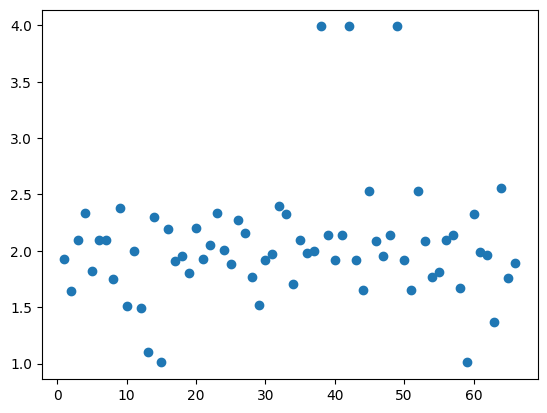

In [7]:
plt.scatter(range(1,len(data1)+1), data1.cjdanjia)

In [8]:
from sklearn.cluster import KMeans

In [13]:
y_pred = KMeans(n_clusters=2).fit_predict(data1[['cjdanjia']])

C:\Users\luhe\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
data1[['cjdanjia']]

,cjdanjia
384,1.93
3778,1.64
6805,2.10
10369,2.34
12006,1.82
...,...
33919,1.96
33921,1.37
36048,2.56
36144,1.76


In [14]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

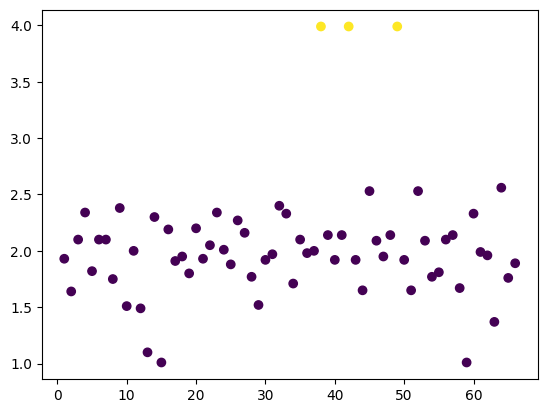

In [18]:
plt.scatter(range(1,len(data1)+1), data1.cjdanjia, c = y_pred)

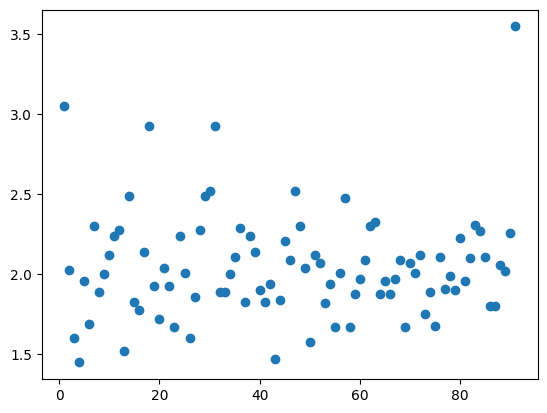

In [19]:
data2 = data[data.cjxiaoqu.str.contains('龙锦苑东五区 3室2厅 124平')]
plt.scatter(range(1,len(data2)+1), data2.cjdanjia)

In [29]:
y_pred = KMeans(n_clusters=2).fit_predict(data2[['cjdanjia']])

C:\Users\luhe\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


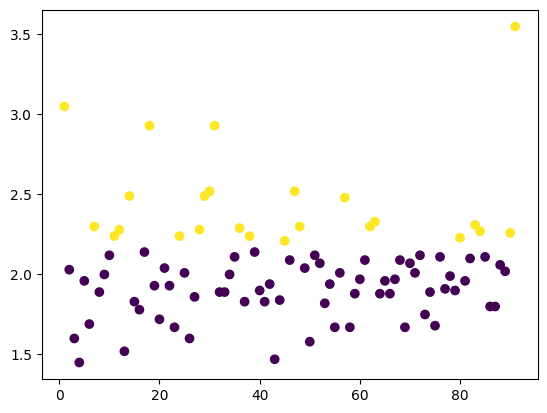

In [30]:
plt.scatter(range(1,len(data2)+1), data2.cjdanjia, c = y_pred)

# DBSCAN算法

In [31]:
from sklearn.cluster import DBSCAN

In [36]:
pd.DataFrame(data2.cjdanjia)

,cjdanjia
380,3.05
390,2.03
1366,1.60
5833,1.45
9577,1.96
...,...
45878,1.80
45882,2.06
45883,2.02
45893,2.26


In [42]:
y_pred = DBSCAN().fit_predict(pd.DataFrame(data2.cjdanjia))
# y_pred = DBSCAN().fit_predict(data2.cjdanjia.values.reshape(-1,1))

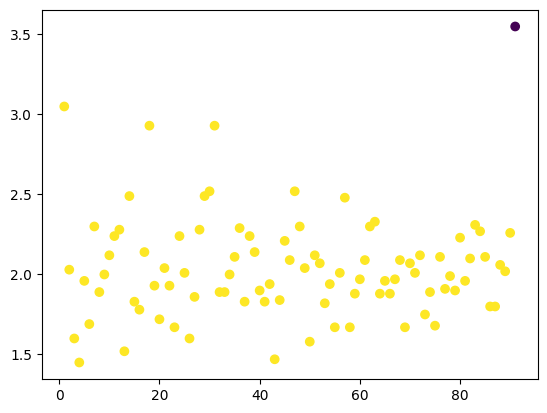

In [43]:
plt.scatter(range(1,len(data2)+1), data2.cjdanjia, c = y_pred)

In [44]:
y_pred = DBSCAN(eps=0.4).fit_predict(data2[['cjdanjia']])

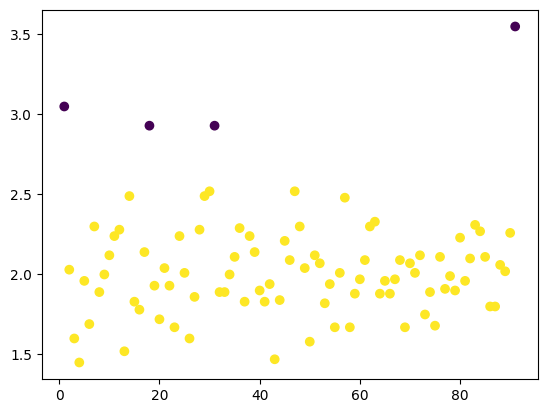

In [45]:
plt.scatter(range(1,len(data2)+1), data2.cjdanjia, c = y_pred)